In [6]:
import pandas as pd
import numpy as np
import glob
import os

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 경로 설정
folder_path = "../data/test/1.회원정보/"
file_list = glob.glob(os.path.join(folder_path, "*.parquet"))

# 파일별 데이터프레임 읽어서 리스트에 저장
df_list = [pd.read_parquet(file) for file in sorted(file_list)]

# 하나의 데이터프레임으로 병합
df_total = pd.concat(df_list, ignore_index=True)


In [8]:
display(df_total)

,기준년월,ID,남녀구분코드,연령,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201807,TEST_00000,1,40대,1,1,0,1,2,2,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),45
1,201807,TEST_00001,1,60대,1,1,0,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀독립기,19
2,201807,TEST_00002,1,40대,1,1,1,1,2,2,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),5
3,201807,TEST_00003,2,40대,1,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),7
4,201807,TEST_00004,2,40대,1,0,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,201812,TEST_99995,2,60대,0,0,0,0,0,0,...,0,0,0,0개,0개,0개,0개,0,노년생활,0
599996,201812,TEST_99996,1,30대,1,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,12
599997,201812,TEST_99997,2,30대,1,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),11
599998,201812,TEST_99998,1,30대,1,1,1,1,3,3,...,0,0,0,0개,0개,0개,0개,0,가족구축기,1


In [9]:
# object 타입은 범주형 변수로 간주
categorical_cols = df_total.select_dtypes(include=['object']).columns.tolist()

# 숫자형 변수는 연속형으로 간주
numerical_cols = df_total.select_dtypes(include=['int64', 'float64']).columns.tolist()


### 범주형 변수 처리

In [10]:
for col in categorical_cols:
    print(f"\n[{col}] value_counts:")
    display(df_total[col].value_counts(dropna= False))



[ID] value_counts:


ID
TEST_99983    6
TEST_99982    6
TEST_99981    6
TEST_99980    6
TEST_99979    6
             ..
TEST_00004    6
TEST_00003    6
TEST_00002    6
TEST_00001    6
TEST_00000    6
Name: count, Length: 100000, dtype: int64


[연령] value_counts:


연령
40대      183816
30대      148890
50대      135600
60대       62124
20대       47028
70대이상     22542
Name: count, dtype: int64


[가입통신회사코드] value_counts:


가입통신회사코드
S사      247153
K사      142936
L사      112828
None     97083
Name: count, dtype: int64


[거주시도명] value_counts:


거주시도명
서울    173320
경기    163559
인천     39984
부산     37844
대전     35741
충북     27754
경남     23546
경북     23185
대구     19900
울산     17243
전남     13791
광주      9463
충남      7509
전북      3579
강원      2899
제주       638
세종        45
Name: count, dtype: int64


[직장시도명] value_counts:


직장시도명
경기      149122
서울      144290
None     62233
인천       36173
부산       33477
대전       30201
충북       25862
경남       23039
경북       21206
대구       18986
울산       16182
전남       13182
광주        8709
충남        6966
전북        5160
강원        3773
세종         778
제주         661
Name: count, dtype: int64


[_1순위신용체크구분] value_counts:


_1순위신용체크구분
신용      572976
체크       19793
None      7231
Name: count, dtype: int64


[_2순위신용체크구분] value_counts:


_2순위신용체크구분
None    239888
신용      217100
체크      143012
Name: count, dtype: int64


[연회비발생카드수_B0M] value_counts:


연회비발생카드수_B0M
0개      598803
1개이상      1197
Name: count, dtype: int64


[상품관련면제카드수_B0M] value_counts:


상품관련면제카드수_B0M
0개    600000
Name: count, dtype: int64


[임직원면제카드수_B0M] value_counts:


임직원면제카드수_B0M
0개    600000
Name: count, dtype: int64


[우수회원면제카드수_B0M] value_counts:


우수회원면제카드수_B0M
0개    600000
Name: count, dtype: int64


[기타면제카드수_B0M] value_counts:


기타면제카드수_B0M
0개    600000
Name: count, dtype: int64


[Life_Stage] value_counts:


Life_Stage
자녀성장(1)    199094
자녀성장(2)    147490
자녀출산기       62059
가족구축기       60986
노년생활        59084
자녀독립기       49144
독신          22143
Name: count, dtype: int64

In [11]:
# 연령
# 40대      733146
# 30대      592146
# 50대      546342
# 60대      246990
# 20대      191880
# 70대이상     89496
# Name: count, dtype: int64

# 연령에서 숫자만 뽑아서 만들기
df_total['연령'] = df_total['연령'].str.extract(r'(\d+)').astype(float)
print(df_total['연령'].describe())

count    600000.000000
mean         41.408800
std          12.329296
min          20.000000
25%          30.000000
50%          40.000000
75%          50.000000
max          70.000000
Name: 연령, dtype: float64


In [12]:
# 가입통신회사코드
# S사      995637
# K사      565208
# L사      451585
# None    387570
# Name: count, dtype: int64

# 결측값 '미확인'으로 채우기
df_total['가입통신회사코드'] = df_total['가입통신회사코드'].fillna('미확인')

# 수동 매핑
telecom_map = {
    '미확인': 0,
    'K사': 1,
    'L사': 2,
    'S사': 3
}

df_total['가입통신회사코드'] = df_total['가입통신회사코드'].map(telecom_map)
print(df_total["가입통신회사코드"].describe())


count    600000.000000
mean          1.850085
std           1.129113
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: 가입통신회사코드, dtype: float64


In [13]:
# 거주시도명
# 서울    692656
# 경기    652987
# 인천    162815
# 부산    149007
# 대전    142800
# 충북    110601
# 경남     96244
# 경북     91237
# 대구     80687
# 울산     70491
# 전남     55304
# 광주     36659
# 충남     30091
# 전북     13572
# 강원     12156
# 제주      2544
# 세종       149

def 시도_그룹화(시도):
    if 시도 in ['서울', '경기', '인천']:
        return 1  # 수도권
    elif 시도 in ['부산', '대구', '대전', '광주', '울산', '세종']:
        return 2  # 광역시
    else:
        return 3  # 그 외 도 단위

df_total['거주시도명'] = df_total['거주시도명'].apply(시도_그룹화)
df_total["거주시도명"].describe()


count    600000.000000
mean          1.543397
std           0.768844
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: 거주시도명, dtype: float64

In [14]:
# 직장시도명
# 경기      598244
# 서울      576618
# None    244969
# 인천      146944
# 부산      131285
# 대전      120697
# 충북      103951
# 경남       94527
# 경북       82975
# 대구       76605
# 울산       66275
# 전남       52849
# 광주       34100
# 충남       28361
# 전북       20442
# 강원       15485
# 세종        3117
# 제주        2556

def 시도_그룹화(시도):
    if pd.isna(시도):
        return -1  # 결측값 처리
    elif 시도 in ['서울', '경기', '인천']:
        return 1  # 수도권
    elif 시도 in ['부산', '대구', '대전', '광주', '울산', '세종']:
        return 2  # 광역시
    else:
        return 3  # 그 외 도 단위

df_total['직장시도명'] = df_total['직장시도명'].apply(시도_그룹화)
df_total["직장시도명"].describe()

count    600000.000000
mean          1.305942
std           1.080511
min          -1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: 직장시도명, dtype: float64

In [15]:
# _1순위신용체크구분
# 신용      2295461
# 체크        76589
# None      27950

# _2순위신용체크구분
# None    958115
# 신용      873447
# 체크      568438

# 우선 결측값을 문자열 'None'으로 통일하지 않고, 바로 NaN 처리 기반으로 인코딩

def encode_신용체크(value):
    if pd.isna(value):
        return -1
    elif value == '체크':
        return 0
    elif value == '신용':
        return 1
    else:
        return -1  # 혹시 모를 이상값 대비


# 컬럼에 적용
df_total['_1순위신용체크구분'] = df_total['_1순위신용체크구분'].apply(encode_신용체크)
df_total['_2순위신용체크구분'] = df_total['_2순위신용체크구분'].apply(encode_신용체크)
print(df_total['_1순위신용체크구분'].describe())
print(df_total['_2순위신용체크구분'].describe())

count    600000.000000
mean          0.942908
std           0.279170
min          -1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: _1순위신용체크구분, dtype: float64
count    600000.000000
mean         -0.037980
std           0.871898
min          -1.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: _2순위신용체크구분, dtype: float64


In [16]:
# 연회비발생카드수_B0M
# 0개      2394826
# 1개이상       5174

# 숫자만 저장
df_total['연회비발생카드수_B0M'] = df_total['연회비발생카드수_B0M'].str.extract(r'(\d+)').astype(int)
print(df_total['연회비발생카드수_B0M'].describe())

count    600000.000000
mean          0.001995
std           0.044621
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: 연회비발생카드수_B0M, dtype: float64


In [17]:
# 해당 열은 삭제제


# 상품관련면제카드수_B0M
# 0개    2400000

# 임직원면제카드수_B0M
# 0개    2400000

# 우수회원면제카드수_B0M
# 0개    2400000

# 기타면제카드수_B0M
# 0개    2400000

cols_to_drop = [
    '상품관련면제카드수_B0M',
    '임직원면제카드수_B0M',
    '우수회원면제카드수_B0M',
    '기타면제카드수_B0M'
]

df_total.drop(columns=cols_to_drop, inplace=True)

In [18]:
# Life_Stage
# 자녀성장(1)    795610
# 자녀성장(2)    591048
# 자녀출산기      245797
# 가족구축기      242373
# 노년생활       233300
# 자녀독립기      198237
# 독신          93635

life_stage_map = {
    '독신': 0,
    '자녀출산기': 1,
    '자녀성장(1)': 2,
    '자녀성장(2)': 3,
    '자녀독립기': 4,
    '가족구축기': 5,
    '노년생활': 6
}

df_total['Life_Stage'] = df_total['Life_Stage'].map(life_stage_map).fillna(-1).astype(int)

### 연속형 변수 처리

In [19]:
# 결측 값 확인

missing_counts = df_total[numerical_cols].isna().sum()
missing_counts = missing_counts[missing_counts > 0]  # 결측치 있는 변수만 필터링

print(missing_counts)


최종유효년월_신용_이용가능     53149
최종유효년월_신용_이용      134817
최종카드발급일자           10854
dtype: int64


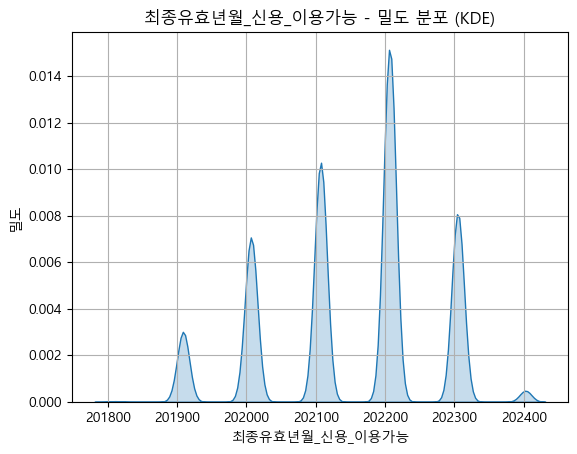

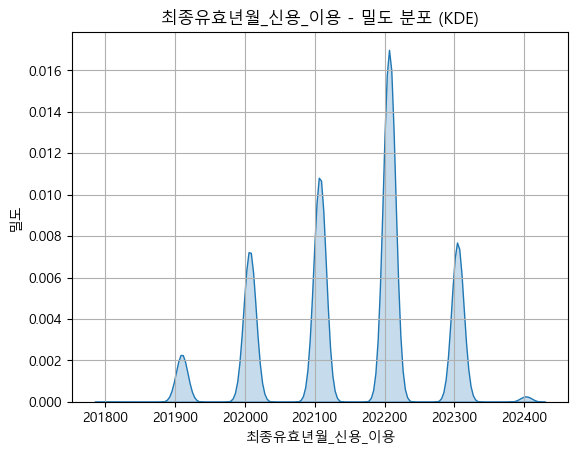

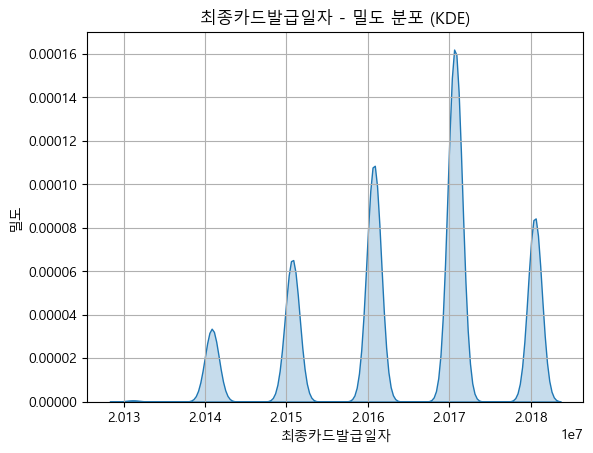

In [20]:

missing_cols = df_total[numerical_cols].columns[df_total[numerical_cols].isna().any()].tolist()

plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우일 경우

for col in missing_cols:
    plt.figure()
    sns.kdeplot(df_total[col].dropna(), fill=True)
    plt.title(f"{col} - 밀도 분포 (KDE)")
    plt.xlabel(col)
    plt.ylabel("밀도")
    plt.grid(True)
    plt.show()

In [21]:
# 최종유효년월_신용_이용가능    210447
# 최종유효년월_신용_이용      534231

# 이 두 개의 변수는 버립시다..
df_total.drop(columns=['최종유효년월_신용_이용', '최종유효년월_신용_이용가능'], inplace=True)


In [22]:
# 1. 기준년월 → datetime(YYYYMM)
df_total['기준년월'] = pd.to_datetime(
    df_total['기준년월'].astype(str).str.extract(r'(\d{6})')[0],
    format='%Y%m',
    errors='coerce'
)

# 2. 최종카드발급일자 처리
#    - 결측값은 2099년 1월 1일로 대체
#    - float → int → str → datetime
df_total['최종카드발급일자_정제'] = df_total['최종카드발급일자'].fillna(20990101.0).astype(int).astype(str)

df_total['최종카드발급일자'] = pd.to_datetime(
    df_total['최종카드발급일자_정제'],
    format='%Y%m%d',
    errors='coerce'
)

# 3. 개월 수 차이 계산 함수
def calc_elapsed_months(later, earlier):
    if pd.isna(later) or pd.isna(earlier):
        return -1
    diff = (later.to_period('M') - earlier.to_period('M')).n
    return diff if diff >= 0 else -1

# 4. 카드보유_개월수 계산
df_total['카드보유_개월수'] = df_total.apply(
    lambda row: calc_elapsed_months(row['기준년월'], row['최종카드발급일자']),
    axis=1
)


In [23]:
print(df_total['기준년월'].head())
print(df_total["최종카드발급일자"].head())
print(df_total['카드보유_개월수'].head())

0   2018-07-01
1   2018-07-01
2   2018-07-01
3   2018-07-01
4   2018-07-01
Name: 기준년월, dtype: datetime64[ns]
0   2014-10-09
1   2016-12-29
2   2018-02-23
3   2017-12-20
4   2018-06-16
Name: 최종카드발급일자, dtype: datetime64[ns]
0    45
1    19
2     5
3     7
4     1
Name: 카드보유_개월수, dtype: int64


In [24]:
# 5. 중간 정제 변수 제거
df_total.drop(columns=['최종카드발급일자_정제', "최종카드발급일자"], inplace=True)

In [25]:
pd.set_option('display.max_columns', None)  # 모든 컬럼 표시
pd.set_option('display.max_rows', None)     # 모든 행도 표시 가능 (원하면)
display(df_total.head())

,기준년월,ID,남녀구분코드,연령,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,회원여부_연체,이용거절여부_카드론,동의여부_한도증액안내,수신거부여부_TM,수신거부여부_DM,수신거부여부_메일,수신거부여부_SMS,가입통신회사코드,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급6개월이내,탈회횟수_발급1년이내,거주시도명,직장시도명,마케팅동의여부,유효카드수_신용체크,유효카드수_신용,유효카드수_신용_가족,유효카드수_체크,유효카드수_체크_가족,이용가능카드수_신용체크,이용가능카드수_신용,이용가능카드수_신용_가족,이용가능카드수_체크,이용가능카드수_체크_가족,이용카드수_신용체크,이용카드수_신용,이용카드수_신용_가족,이용카드수_체크,이용카드수_체크_가족,이용금액_R3M_신용체크,이용금액_R3M_신용,이용금액_R3M_신용_가족,이용금액_R3M_체크,이용금액_R3M_체크_가족,_1순위카드이용금액,_1순위카드이용건수,_1순위신용체크구분,_2순위카드이용금액,_2순위카드이용건수,_2순위신용체크구분,보유여부_해외겸용_본인,이용가능여부_해외겸용_본인,이용여부_3M_해외겸용_본인,보유여부_해외겸용_신용_본인,이용가능여부_해외겸용_신용_본인,이용여부_3M_해외겸용_신용_본인,연회비발생카드수_B0M,연회비할인카드수_B0M,기본연회비_B0M,제휴연회비_B0M,할인금액_기본연회비_B0M,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,카드신청건수,Life_Stage,최종카드발급경과월,카드보유_개월수
0,2018-07-01,TEST_00000,1,40.0,1,1,0,1,2,2,20140501,51,0,1,0,1,1,1,1,1,1,100,0,0,1,1,0,2,2,1,0,0,2,2,1,0,0,2,2,1,0,0,21458,21458,7879,0,0,13852,51,1,6021,33,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,2,45,45
1,2018-07-01,TEST_00001,1,60.0,1,1,0,1,1,1,20160201,30,0,0,0,0,0,0,0,3,2,20,0,0,1,1,1,2,1,0,1,0,2,1,0,1,0,2,1,0,1,0,18681,10759,0,7921,0,11065,40,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,4,19,19
2,2018-07-01,TEST_00002,1,40.0,1,1,1,1,2,2,20180301,5,0,0,0,0,0,0,0,3,2,101,0,0,1,1,1,2,2,0,0,0,2,2,0,0,0,2,2,0,0,0,40758,40758,0,0,0,27071,154,1,10704,69,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,5
3,2018-07-01,TEST_00003,2,40.0,1,1,1,1,1,1,20120701,73,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,5255,5255,0,0,0,4827,105,1,0,0,-1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,2,7,7
4,2018-07-01,TEST_00004,2,40.0,1,0,1,1,1,1,20031201,176,0,0,0,1,1,1,0,3,0,0,0,0,1,1,1,3,2,0,1,0,3,2,0,1,0,3,2,0,1,0,16148,14290,0,1857,0,8011,52,1,6387,39,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1


In [26]:
# describe 출력
numerical_cols = [col for col in numerical_cols if col not in ['최종유효년월_신용_이용가능', '최종유효년월_신용_이용', '최종카드발급일자']]
df_total[numerical_cols].describe().transpose()

,count,mean,min,25%,50%,75%,max,std
기준년월,600000,2018-09-15 20:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-16 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,NaN
남녀구분코드,600000.0,1.47614,1.0,1.0,1.0,2.0,2.0,0.499431
회원여부_이용가능,600000.0,0.951805,0.0,1.0,1.0,1.0,1.0,0.214178
회원여부_이용가능_CA,600000.0,0.878753,0.0,1.0,1.0,1.0,1.0,0.326414
회원여부_이용가능_카드론,600000.0,0.620203,0.0,0.0,1.0,1.0,1.0,0.485337
소지여부_신용,600000.0,0.981932,0.0,1.0,1.0,1.0,1.0,0.133199
소지카드수_유효_신용,600000.0,1.245337,0.0,1.0,1.0,1.0,4.0,0.566857
소지카드수_이용가능_신용,600000.0,1.150985,0.0,1.0,1.0,1.0,3.0,0.619999
입회일자_신용,600000.0,20122713.782,19910701.0,20100301.0,20140701.0,20170601.0,20180601.0,60364.888869
입회경과개월수_신용,600000.0,73.440873,2.0,17.0,51.0,103.0,329.0,72.283611


In [27]:
df_total.head()

,기준년월,ID,남녀구분코드,연령,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,회원여부_연체,이용거절여부_카드론,동의여부_한도증액안내,수신거부여부_TM,수신거부여부_DM,수신거부여부_메일,수신거부여부_SMS,가입통신회사코드,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급6개월이내,탈회횟수_발급1년이내,거주시도명,직장시도명,마케팅동의여부,유효카드수_신용체크,유효카드수_신용,유효카드수_신용_가족,유효카드수_체크,유효카드수_체크_가족,이용가능카드수_신용체크,이용가능카드수_신용,이용가능카드수_신용_가족,이용가능카드수_체크,이용가능카드수_체크_가족,이용카드수_신용체크,이용카드수_신용,이용카드수_신용_가족,이용카드수_체크,이용카드수_체크_가족,이용금액_R3M_신용체크,이용금액_R3M_신용,이용금액_R3M_신용_가족,이용금액_R3M_체크,이용금액_R3M_체크_가족,_1순위카드이용금액,_1순위카드이용건수,_1순위신용체크구분,_2순위카드이용금액,_2순위카드이용건수,_2순위신용체크구분,보유여부_해외겸용_본인,이용가능여부_해외겸용_본인,이용여부_3M_해외겸용_본인,보유여부_해외겸용_신용_본인,이용가능여부_해외겸용_신용_본인,이용여부_3M_해외겸용_신용_본인,연회비발생카드수_B0M,연회비할인카드수_B0M,기본연회비_B0M,제휴연회비_B0M,할인금액_기본연회비_B0M,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,카드신청건수,Life_Stage,최종카드발급경과월,카드보유_개월수
0,2018-07-01,TEST_00000,1,40.0,1,1,0,1,2,2,20140501,51,0,1,0,1,1,1,1,1,1,100,0,0,1,1,0,2,2,1,0,0,2,2,1,0,0,2,2,1,0,0,21458,21458,7879,0,0,13852,51,1,6021,33,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,2,45,45
1,2018-07-01,TEST_00001,1,60.0,1,1,0,1,1,1,20160201,30,0,0,0,0,0,0,0,3,2,20,0,0,1,1,1,2,1,0,1,0,2,1,0,1,0,2,1,0,1,0,18681,10759,0,7921,0,11065,40,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,4,19,19
2,2018-07-01,TEST_00002,1,40.0,1,1,1,1,2,2,20180301,5,0,0,0,0,0,0,0,3,2,101,0,0,1,1,1,2,2,0,0,0,2,2,0,0,0,2,2,0,0,0,40758,40758,0,0,0,27071,154,1,10704,69,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,5
3,2018-07-01,TEST_00003,2,40.0,1,1,1,1,1,1,20120701,73,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,5255,5255,0,0,0,4827,105,1,0,0,-1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,2,7,7
4,2018-07-01,TEST_00004,2,40.0,1,0,1,1,1,1,20031201,176,0,0,0,1,1,1,0,3,0,0,0,0,1,1,1,3,2,0,1,0,3,2,0,1,0,3,2,0,1,0,16148,14290,0,1857,0,8011,52,1,6387,39,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1


In [28]:
cheat = pd.read_csv("../clean_data/userinfo_train_preprocessed.csv")

In [33]:
cheat_cols = [col for col in cheat.columns if col != 'Segment']

# 2. total_df에서 해당 컬럼만 선택 (순서 맞춰서)
total_df = df_total[cheat_cols].copy()

In [35]:
print(len(total_df.columns))

66


In [38]:
print(len(cheat.columns))

67


In [39]:
total_df.to_csv('../clean_data/userinfo_test_preprocessed.csv', index=False)